In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 6: Probability

Last update: Jan 23, 2019

In data science, we work with a dataset that has a finite number of observations (rows). However, we want to draw conclusion beyond the data we have collected. For example, we collect data from MUIC students, we discover an interesting pattern, we want to draw a conclusion for bigger population, not just MUIC students. 

Here's where probability theory comes in. Our data or observations is **believed** to be a random sample of some underlying "true" population. In order to draw any conclusion beyond the sample, we need a formal framework, the probability theory, to guide us. Understanding the connection between sample and population is vital in data science. 

Before we start, let's talk about a about the following concepts:

- **[Experiment](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29))**:
  A single occurrence with an outcome that is uncertain until we observe it. 
  <br>*For example, rolling a single die.*
- **[Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29)):**
  A possible result of a trial; one particular state of the world.
  <br>*For example:* `4`.
- **[Sample Space](https://en.wikipedia.org/wiki/Sample_space):**
  The set of all possible outcomes for the experiment. 
  <br>*For example,* `{1, 2, 3, 4, 5, 6}`.
- **[Event](https://en.wikipedia.org/wiki/Event_(probability_theory%29)):**
  A subset of outcomes that together have some property we are interested in.
  <br>*For example, the event "even die roll" is the set of outcomes* `{2, 4, 6}`. 
- **[Probability](https://en.wikipedia.org/wiki/Probability_theory):**
  The probability of an event with respect to a sample space is the "number of favorable cases" (outcomes from the sample space that are in the event) divided by the "number of all the cases" in the sample space (assuming "nothing leads us to expect that any one of these cases should occur more than any other"). Since this is a proper fraction, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event).
<br>*For example, the probability of an even die roll is 3/6 = 1/2.*

In [4]:
# rolling a die 
print('roll=', np.random.randint(1,7))

roll= 3


In [5]:
n = 10
obs = np.random.randint(1,7,size=n)
# even_count
even_count = len(obs[obs%2==0])

# approx P(even die roll)
print(even_count/n)

0.5


## Random variables 

A random variable, $X$, is a mapping from a real number to an event. For example, the value of a roll of a die is a random variable. This variable, $X$, can take values 1 - 6. We don't know its exact value till the die roll is actually performed.

$$X = \left\{
    \begin{array}{ll}
        1 & \text{if die roll = 1}\\
        2 & \text{if die roll = 2}\\
        3 & \text{if die roll = 3}\\
        4 & \text{if die roll = 4}\\
        5 & \text{if die roll = 5}\\
        6 & \text{if die roll = 6}
    \end{array}\right.$$


Since each event is associated with a probability, we can talk about the probability of X being 1, 2, etc.

$$P(X=1) = P(\text{die roll 1}) = 1/6$$

Normally, we don't know the exactly value of a random variable because it will depend on the outcome of the experiment.

## Probability distribution

A probability distribution is a function that assigns a probability to every possible value of a random variable. For example, the random variable X that represents the value of a die rolls and can take values 1 to 6, each with a probability of 1/6 has a distribution: $P(X=i) = 1/6$, where i = 1,2,3,4,5,6


Random variables can be separated into two different classes:

- Discrete random variables
- Continuous random variables

### Discrete Random Variables

Discrete Random Variable have finitely countable outcomes. For example, the value of a coin toss can only be H or T, each with a probability of $1/2$. Similarly the value of a die roll can only be between 1 and 6

For discrete random variables where X can take a finite set of values, the probability distribution function (aka probability mass function), gives the probability $p(x)$ that X is exactly equal to some value. $p(x) = P(X=x)$, where x belongs to the finite set of values that are possible

A probability distribution function has two main properties:

$0 \leq p(x) \leq 1$ because all probabilities are in the interval $[0, 1]$
The sum of all probabilities $p(x)$ over all values of X is equal to $1$. The total weights for all values of the random variable must add to $1$.


#### Uniform distribution

A die roll can have 6 values, each value can occur with a probability of $1/6$. Each time we roll the die, we have an equal chance of getting each face. This is an example of uniform distribution. 

<BarContainer object of 6 artists>

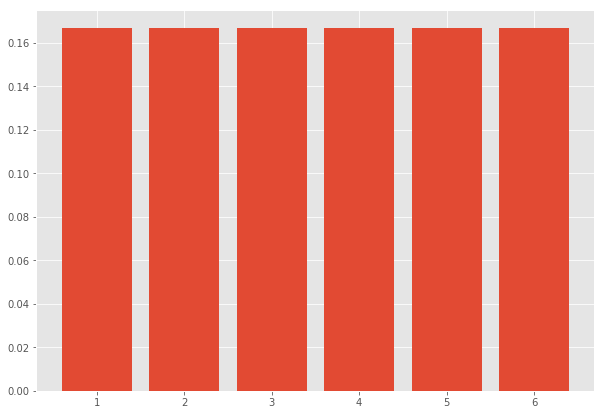

In [37]:
plt.figure(figsize=(10,7))
plt.bar([i for i in range(1,7)], [1/6] * 6)

#### Binomial distribution

A binomial distribution is used to describe successes and failures in a binary experiment. This can be very useful in an investment context as many of our choices tend to be binary like this. A single experiment which can result in success with probability $p$ and failure with probability $(1-p)$ is called a Bernoulli trial.

Let X be random variable such that:

$$X = \left\{
    \begin{array}{ll}
        1 & \text{if the Bernoulli trial succeeds}\\
        0 & \text{if the Bernoulli trial fails}
    \end{array}\right.$$
    
That means $P(X=1) = p$ and $P(X=0) = 1-p$. In some books, they write $X \sim Bernoulli(p)$.

If we perform $n$ **independent** Bernoulli trials and count how successes and fails we got. Let $Y$ be another random variable representing this count. Let $X_i$ be a random variable representing i-th Bernoulli trial.

$$Y = \sum_{i=1}^{n} X_i$$

Now we can look at probability distribution of $Y$. 
- $P(Y=0) = (1-p)^n$ 
- $P(Y=1) = {n \choose 1}(p)(1-p)^{n-1}$
- ...
- $P(Y=k) = {n \choose k}(p)^k(1-p)^{n-k}$
- ...
- $P(Y=n) = (p)^n$

Here, $Y$ is also known a binomial random variable and it is denoted as $Y \sim B(n, p)$.

<BarContainer object of 11 artists>

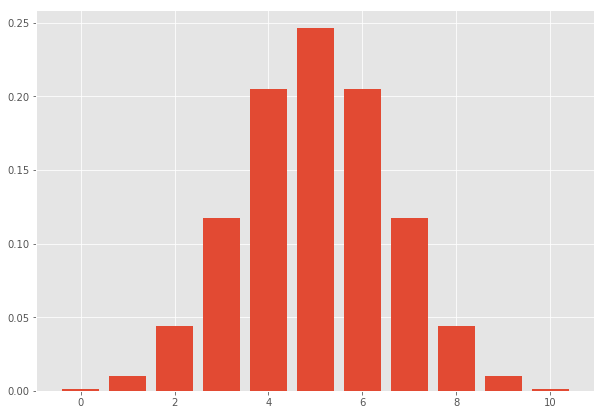

In [2]:
from scipy.special import comb 

n = 10
p = 0.5
x = [k for k in range(n+1)]
pmf = [ comb(n,k)*(p**k)*(1-p)**(n-k) for k in range(n+1)]

plt.figure(figsize=(10,7))
plt.bar(x, pmf)

## Continuous random variables

For continuous random variables (where X can take an infinite number of values over a continuous range), the probability of a single point, the probability that X is exactly equal to some value is zero. In this case, the probability distribution function, gives the probability over intervals which can include infinitely many outcomes. Here we define a **probability density function (PDF)**, $f(x)$, such that we can say:

$$P(a<X<b) = \int_a^b f(x) dx$$


Just like a probability distribution function $f(x)$ gives the probability that a random variable lies in a range, a **cumulative distribution function (CDF)** $F(x)$ describes the probability that a random variable is less than or equal to a given value.

$$F(x) = P(X \le x) = \int_{-\infty}^x f(x) dx $$


### Normal distribution

Many important tests and methods in statistics, and by extension, finance, are based on the assumption of normality. A large part of this is due to the results of the Central Limit Theorem (CLT) which states that the sum of many independent random variables tends toward a normal distribution, even if the original variables themselves are not normally distributed. The convenience of the normal distribution finds its way into certain algorithmic trading strategies as well.


Normal distributions are described by two parameters: $\mu$ and $\sigma^2$, where $\mu$ is the distribution mean and $\sigma$ is the standard deviation). The probability density of the normal distribution is:


$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

And is defined for $-\infty \lt x \lt \infty$. When we have $\mu = 0$ and $\sigma = 1$, we call this the **standard normal distribution**.

By changing $\mu$ and $\sigma$ of the normal distribution, we can change the depth and width of the bell curve. With a larger standard deviation, the values of the distribution are less concentrated around the mean.


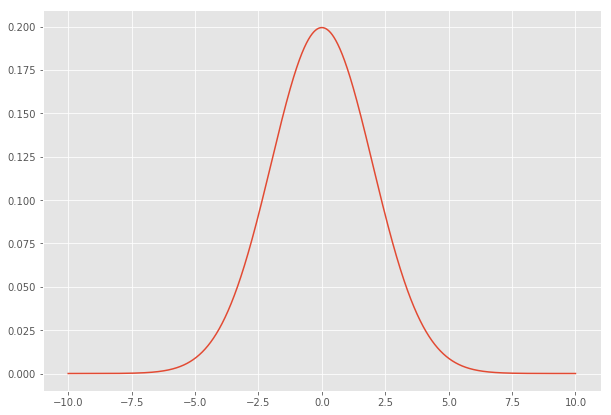

In [46]:
from scipy.stats import norm

x = np.arange(-10, 10, 0.001)

mu = 0 
variance = 1000000000
# plt.figure(figsize=(10,7))
plt.plot(x, norm.pdf(x,mu,variance))

### The Central Limit Theorem

One reason the normal distribution is so useful is the central limit theorem (CLT). Informally, the CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger: 

In particular, if $x_1, ..., x_n$ are **independent and identically distributed (IID)** random variables (from any distribution). Let $Y = \frac{\sum_i^N x_i}{N}$.

From the CLT, we will have that $Y \sim Normal(\mu,\sigma)$ as the N goes to infinity. 


(array([1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 6.000e+00,
        6.000e+00, 1.700e+01, 2.500e+01, 4.200e+01, 5.800e+01, 9.500e+01,
        1.710e+02, 2.560e+02, 3.840e+02, 5.170e+02, 6.850e+02, 9.650e+02,
        1.173e+03, 1.481e+03, 1.889e+03, 2.262e+03, 2.565e+03, 2.891e+03,
        3.085e+03, 3.402e+03, 3.352e+03, 3.396e+03, 3.248e+03, 3.129e+03,
        2.799e+03, 2.459e+03, 2.181e+03, 1.841e+03, 1.463e+03, 1.136e+03,
        8.890e+02, 6.700e+02, 5.030e+02, 3.430e+02, 2.160e+02, 1.490e+02,
        1.070e+02, 5.900e+01, 3.100e+01, 1.900e+01, 1.200e+01, 8.000e+00,
        4.000e+00, 3.000e+00]),
 array([4.623  , 4.63702, 4.65104, 4.66506, 4.67908, 4.6931 , 4.70712,
        4.72114, 4.73516, 4.74918, 4.7632 , 4.77722, 4.79124, 4.80526,
        4.81928, 4.8333 , 4.84732, 4.86134, 4.87536, 4.88938, 4.9034 ,
        4.91742, 4.93144, 4.94546, 4.95948, 4.9735 , 4.98752, 5.00154,
        5.01556, 5.02958, 5.0436 , 5.05762, 5.07164, 5.08566, 5.09968,
        5.1137 , 5.12

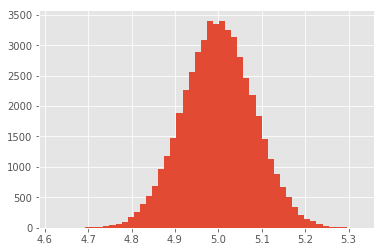

In [7]:
n = 1000
m = 50000

avg = []
for i in range(m):
    x = np.random.randint(1,10,n)
    avg.append(np.mean(x))

plt.hist(avg,bins=50)

# mu = mu
# sd = sd / srqt(n)

### Expectation

Although you dont know the actual value of a random variable, you can always find out its **expectation**. Suppose we have a random variable $X$. The expectation of $X$, $E[X]$, is just a number.

$$E[X] = \int_{-\infty}^{\infty}  x f(x) dx $$

or

$$E[X] = \sum_{i} x_i p(x_i)$$


The concept of expectation is similar to that of central tendency, but it is for distributions.

Let $Y \sim Binomial(n=10,p=0.5)$. We don't know the value of $Y$ but we know $E[Y] = 10(0.5) = 5$


#### Mean and Variance of a random variable

In general, the **mean** and **variance** of a random variable $X$ is given by: $E[X]$ and $E[(X-E[X])^2]$ respectively. 


When $X \sim Normal(\mu,\sigma)$, it can be shown that:

$$E[X] = \mu$$

and

$$E[(X-E[X])^2] = \sigma^2$$



## Back to Data Science

Suppose you collect height data, $H = [h_1,h_2,h_3,...,h_n]$, from MUIC students. One way to approach this is to think of observations as IID random variable. Namely, $h_i$ is a random variable drawn from some unknown distribution $D$, or $h_i \sim D$ and $h_i$ is independent of $h_j$ for any $i,j$. 

Our goal is when we observe the value of $h_i$, we can then learn something about the underlying distribution $D$.

From CLT, we know that the average height from the sample will be close to the mean of $D$ as $N$ goes to infinity.

In [4]:
H = [172, 172, 171, 173, 176, 171, 177, 168, 175, 169, 172, 175, 174,
       168, 173, 175, 175, 175, 172, 173, 172, 173, 170, 172, 168, 177,
       175, 175, 172, 172, 171, 172, 168, 175, 172, 173, 170, 174, 175,
       176, 172, 169, 171, 172, 172, 168, 174, 173, 170, 172, 175, 173,
       172, 177, 172, 174, 172, 169, 172, 170, 174, 171, 177, 168, 171,
       169, 168, 172, 172, 173, 169, 175, 174, 168, 170, 172, 174, 168,
       175, 174, 172, 173, 173, 175, 169, 177, 171, 174, 174, 177, 169,
       168, 171, 170, 175, 172, 176, 175, 177, 173]

(array([10.,  7.,  6.,  8., 23., 11., 10., 15.,  3.,  7.]),
 array([168. , 168.9, 169.8, 170.7, 171.6, 172.5, 173.4, 174.3, 175.2,
        176.1, 177. ]),
 <a list of 10 Patch objects>)

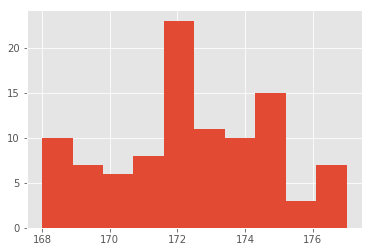

In [5]:
plt.hist(H,bins=10)

### Maximum likelihood estimates (MLE)

Suppose we have a random sample $X_1, X_2,..., X_n$ that are IID RVs of some assumed distribution with some unknown parameter $\theta$. Our goal is to find a "good" estimate of $\theta$ based on the observed values of these RVs.

For example, if we assume that $X_1, X_2,..., X_n$ are normally distributed with mean $\mu$ and variance $\sigma^2$, then our goal will be to find a good estimate of $\mu$ and $\sigma$, using the data $x_1, x_2,..., x_n$ that we obtained.

This goal seems reasonable and we should be able to find a "good" estimate for $\mu$ and $\sigma$. Let $\hat{\mu}$ and $\hat{\sigma}$ be our estimates. Let's define something called **likelihood** function, $L(x_1,x_2,..,x_n;\hat{\mu},\hat{\sigma})$ to present how "likely" that $x_1,x_2,...,x_n$ are drawn from $Normal(\hat{\mu},\hat{\sigma})$. Since $X_i$'s are IID.

$$
L(x_1,x_2,..,x_n;\hat{\mu},\hat{\sigma}) = \prod_{i}^n f(x_i;\hat{\mu},\hat{\sigma})
$$

where $f(x_i;\hat{\mu},\hat{\sigma})$ is the probability density of $Normal(\hat{\mu},\hat{\sigma})$ at $x_i$.

We can expand out $f()$

$$
\begin{array}{ll}
L(x_1,x_2,..,x_n;\hat{\mu},\hat{\sigma}) &= \prod_{i}^n f(x_i;\hat{\mu},\hat{\sigma})\\
& = \hat{\sigma}^{-n/2} (2\pi)^{-n/2} exp [ -\frac{1}{2\hat{\sigma}}\sum_{i=1}^n (x_i-\hat{\mu})^2 ]
\end{array}
$$

We know that $\hat{\mu}$ and $\hat{\sigma}$ that maximizes the likelihood $L$ will also maxmizes $\log(L(X;\hat{\mu},\hat{\sigma}))$, and vice versa. So we simplify our process a little by finding $\hat{\mu}$ and $\hat{\sigma}$ that maximizes **the log likelihood function**, $\log L(X:\hat{\mu},\hat{\sigma})$ instead.


$$
\begin{array}{ll}
\log L(x_1,x_2,..,x_n;\hat{\mu},\hat{\sigma}) &= -\frac{n}{2}\log \hat{\sigma}-\frac{n}{2}\log (2\pi)-\sum_{i=1}^n \frac{(x_i-\hat{\mu})^2}{2\hat{\sigma}}  
\end{array} 
$$

Let's take partial derivatives w.r.t. $\hat{\mu}, \hat{\sigma}$ and set them to 0.

$$
\frac{\partial \log L(x_1,x_2,..,x_n;\hat{\mu},\hat{\sigma})}{\partial \hat{\mu}} = -2\frac{\sum_{i=1}^n(x_i - \hat{\mu})(-1)}{2\hat{\sigma}} = 0
$$

So, $$\hat{\mu} = \frac{\sum_{i=1}^n x_i}{n}$$

<div class="alert alert-block alert-success">
    <b>Your Task:</b>Now try to derive the maximum likelihood estimate for $\sigma$
</div>

$$\hat{\sigma} = \sqrt{\frac{\sum_{i=1}^n (x_i - \hat{\mu})^2}{n}}$$

<div class="alert alert-block alert-success">
    <b>Your Task:</b> Find the MLE of mu and sigma given the dataset H above
</div>

In [13]:
# Fill code here

def MLE_mu(dataset):
    ssum = np.sum(dataset)
    ssize = len(dataset)
    return ssum/ssize

def MLE_sd(dataset):
    mu = MLE_mu(dataset)
    exp = 0
    for each in dataset:
        exp += (each - mu)**2
    var = exp/len(dataset)
    return var**0.5

print(MLE_mu(H))
print(MLE_sd(H))

172.42
2.54236110731737


### Unbiased estimators

Suppose we observe data $x_1,x_2,...,x_n$ and we assume that the population distribution is $Normal(\mu,\sigma)$. The same setup we had earlier. 

You probably have seen in many textbooks stating that the sample variance is given by:

$$
\bar{\sigma}^2 = \frac{\sum_{i=1}^n (x_i - \bar{X})^2}{n-1}
$$

Note the $n-1$ in the denominator and it is different from our MLE solution! 

In fact, This $\bar{\sigma}^2$ estimate is known as the "unbiased" estimate of $\sigma$.

That's right. Our MLE estimate is in fact "biased". 

Let $X_1, X_2, ..., X_n$ be IID RVs, each with the expected value = $\mu$ and variance $\sigma^2$.

Let S be another random variable where $$S^2 =  \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$$ where $\bar{X} = \sum_{i=1}^n X_i$

So, the expectation of $S^2$ is
$$
E[S^2] = \frac{1}{n}E[ \sum_{i=1}^n (X_i - \bar{X})^2]\\
= \frac{1}{n}E[ \sum_{i=1}^n (X_i - \mu + \mu - \bar{X}) ^2]\\
= \frac{1}{n}E[ \sum_{i=1}^n ((X_i - \mu) - (\bar{X}-\mu)) ^2]\\
= \frac{1}{n}E[ \sum_{i=1}^n (X_i - \mu)^2 - 2 \sum_{i=1}^n (X_i - \mu)(\bar{X}-\mu) + \sum_{i=1}^n (\bar{X}-\mu)^2]\\
= \frac{1}{n}\left(\sum_{i=1}^n  E[(X_i - \mu)^2] - n E[(\bar{X}-\mu)^2]\right)\\
$$

Since $E[(X_i - \mu)^2] $ is the variance $\sigma^2$ and $E[(\bar{X}-\mu)^2] = \sigma^2/n$ from CLT, 

$$
E[S^2] = \frac{1}{n}(n\sigma^2 - n\frac{\sigma^2}{n}) = \frac{n-1}{n} \sigma^2
$$

Here we can see that the expectation of $S^2$ is a little smaller than the true variance $\sigma^2$. That's why we say $S^2$ is a biased estimate of $\sigma^2$, and the unbiased estimate would be $\frac{n}{n-1}S^2$, which is:

$$
\bar{S}^2 = \frac{n}{n-1}S^2 = \frac{\sum_{i=1}^n (x_i - \bar{X})^2}{n-1}
$$




<div class="alert alert-block alert-success">
    <b>Your Task:</b> Design an experiment to compare MLE estimate and unbiased estimate of variance on the following data set.
</div>

(array([ 2.,  3., 11., 18., 20., 17., 12.,  5.,  8.,  4.]),
 array([102.34008761, 115.82563469, 129.31118177, 142.79672884,
        156.28227592, 169.767823  , 183.25337007, 196.73891715,
        210.22446423, 223.7100113 , 237.19555838]),
 <a list of 10 Patch objects>)

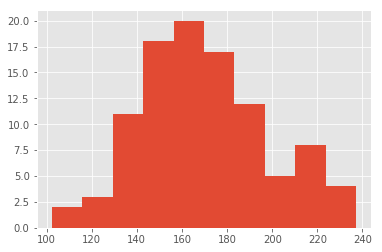

In [18]:
true_mu = 170
true_sigma = 30
n = 100

data = np.random.randn(n)*true_sigma + true_mu 
plt.hist(data)

In [25]:
# Fill code here

def unbiased_mu(dataset):
    ssum = np.sum(dataset)
    ssize = len(dataset)
    return ssum/ssize

def unbiased_sd(dataset):
    mu = unbiased_mu(dataset)
    exp = 0
    for each in dataset:
        exp += (each - mu)**2
    var = exp/(len(dataset)-1)
    return var**0.5

print(unbiased_mu(data))
print(unbiased_sd(data))

169.97090986129078
28.509280120485144
